# nlopt investigation

Explore regression tests in PROCESS using the `nlopt` non-linear optimisation package.

Firstly, import functions to run different solvers and compare solutions.

In [8]:
from plot_solvers import copy_regression_ref, run_regression_input, plot_mfile_solutions

# Should reload Process each time (keep editable install up-to-date)
%load_ext autoreload
%aimport process, plot_solvers
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Baseline 2017 comparison

### nlopt against regression reference

Copy the baseline 2017 regression reference mfile to the CWD, then run the baseline 2017 input file with nlopt.

In [10]:
# Copy baseline_jan_2017 regression reference mfile to CWD
baseline_jan_2017_ref_mfile_path = copy_regression_ref("baseline_jan_2017")
# Run baseline_jan_2017 input using nlopt
baseline_jan_2017_nlopt_mfile_path = run_regression_input("baseline_jan_2017", "nlopt")

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The number of iteration variables is counted automatically and does not need to be stated in IN.DAT.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-529-g85cdde289 code contains untracked changes
    Branch : nlopt-test-2
   Git log : Simplify logging to process.log
 Date/time :  4 Apr 2023 12:15:11 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory : /home/jon/code/notebooks/nlopt_pr

It solves using nlopt. Now plot the normalised values of the nlopt solution against the reference solution. The Figure Of Merit (FOM) is normalised to the reference value.

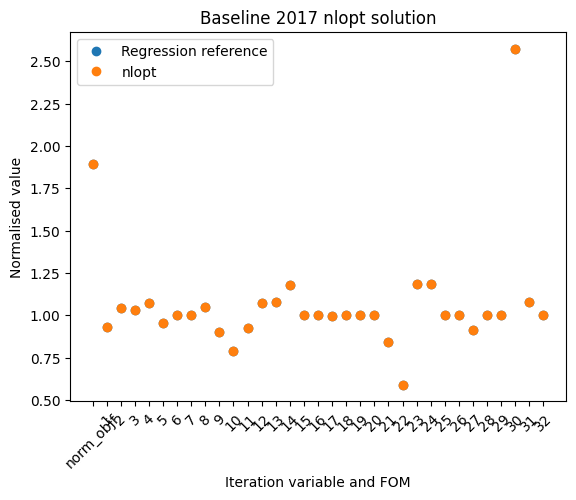

In [11]:
plot_mfile_solutions(
    baseline_jan_2017_ref_mfile_path,
    baseline_jan_2017_nlopt_mfile_path,
    "Regression reference",
    "nlopt",
    "Baseline 2017 nlopt solution",
    percentage=False,
)


Generally nlopt produces a very similar solution to the reference solution (as shown by the overlapping points), but iteration variables 23 and 24 show differences. These are both present in constraint equation 34:

```fortran
tmp_cc =  1.0D0 - fvdump * vdalw/vtfskv
```

where `vdalw` is the max voltage across TF coil during quench (kV) and `fvdump` is its corresponding f-value, corresponding to iteration variables 24 and 23 respectively. `vtfskv` is the voltage across a TF coil during quench (kV), and is an output variable. The increase in `vdalw` is approximately compensated by the decrease in `fvdump` to ensure the constraint is satisfied.

Therefore despite this difference with the reference solution, this appears to be equally valid, with the FOM unaffected.

However, instead of plotting two sets of normalised iteration variable values, it is clearer to plot percentage differences between the two solutions (like in regression tests).

/home/jon/code/notebooks/nlopt_process/plot_solvers.py:489: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(opt_params_labels)
/home/jon/code/notebooks/nlopt_process/plot_solvers.py:510: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(norm_objf_label)


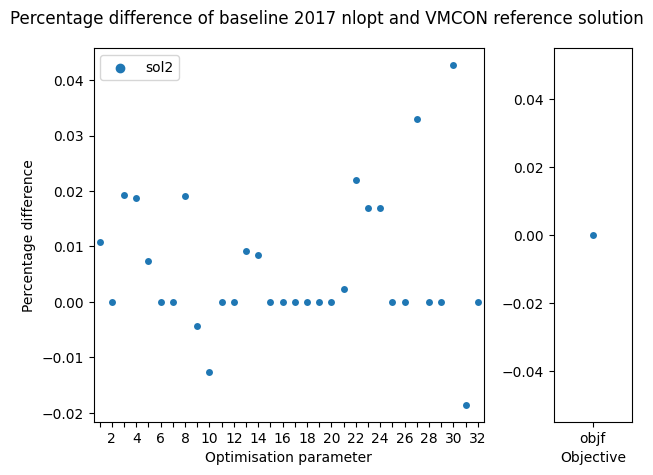

In [12]:
plot_mfile_solutions(
    baseline_jan_2017_ref_mfile_path,
    baseline_jan_2017_nlopt_mfile_path,
    "Regression reference",
    "nlopt",
    "Percentage difference of baseline 2017 nlopt and VMCON reference solution",
)


This shows more clearly that the main difference between the reference and nlopt solutions for baseline 2017 is in iteration variables 23 and 24. Percentage difference solution comparisons will be used from this point on.

### nlopt compared against "fixed" VMCON run

Some "fixes" to Process models were needed in order to get nlopt to run for baseline 2017, as it frequently ran into un-evaluateable points when optimising. These un-evaluatable points involved divide-by-zeros or complex roots in the models which were unphysical and required mitigating. There are various strategies for doing this including adding additional constraints, creating more refined models or crude "kludges" which simply avoid the problem by providing a minimum or maximum value for a variable or a small displacement away from the problem value. 

Whilst such unevaluatable points highlight weaknesses in the formulation of the problem to be solved and/or the models being evaluated, such kludges were used to quickly allow the feasibility of nlopt to be assessed whilst causing minimal disruption to existing solutions. It may be better to address these unevaluatable point mitigation strategies more thoroughly in future.

In light of this, the "fixed" models will be run with VMCON and the solution compared against the regression reference result to determine the impact of these mitigating strategies on the VMCON result.

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The number of iteration variables is counted automatically and does not need to be stated in IN.DAT.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-529-g85cdde289 code contains untracked changes
    Branch : nlopt-test-2
   Git log : Simplify logging to process.log
 Date/time :  4 Apr 2023 12:17:21 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory : /home/jon/code/notebooks/nlopt_pr

/home/jon/code/notebooks/nlopt_process/plot_solvers.py:489: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(opt_params_labels)
/home/jon/code/notebooks/nlopt_process/plot_solvers.py:510: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(norm_objf_label)


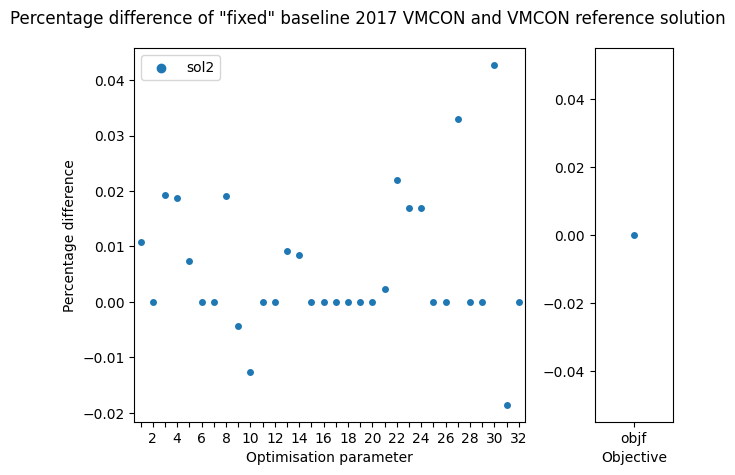

In [13]:
# Run process on the baseline input file using vmcon
baseline_jan_2017_vmcon_mfile_path = run_regression_input("baseline_jan_2017", "legacy-vmcon")
plot_mfile_solutions(
    baseline_jan_2017_ref_mfile_path,
    baseline_jan_2017_vmcon_mfile_path,
    "Regression reference",
    "vmcon",
    "Percentage difference of \"fixed\" baseline 2017 VMCON and VMCON reference solution",
)


There appears to be no difference at all to the VMCON solution due to the mitigating strategies employed in models to allow nlopt to run.

### nlopt against "fixed" VMCON

Now compare VMCON and nlopt solutions to baseline 2017, both using the same "fixed" models.

/home/jon/code/notebooks/nlopt_process/plot_solvers.py:489: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(opt_params_labels)
/home/jon/code/notebooks/nlopt_process/plot_solvers.py:510: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(norm_objf_label)


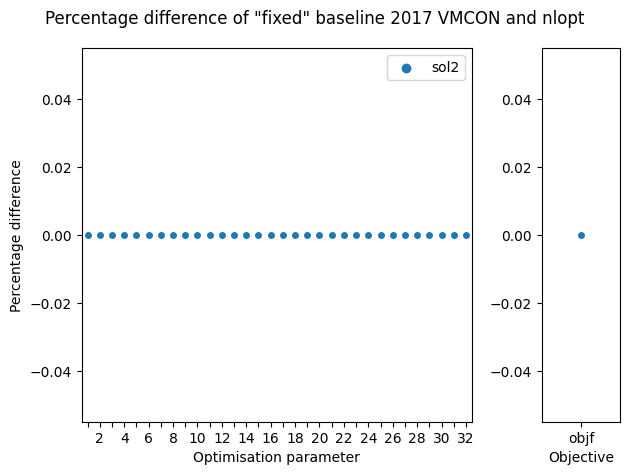

In [14]:
plot_mfile_solutions(
    baseline_jan_2017_vmcon_mfile_path,
    baseline_jan_2017_nlopt_mfile_path,
    "vmcon",
    "nlopt",
    "Percentage difference of \"fixed\" baseline 2017 VMCON and nlopt"
)


As before, the dominating difference is due to optimisation parameters 23 and 24. Otherwise, the VMCON and nlopt solutions appear very similar for baseline 2017.

## Other regression tests

Whilst there is good agreement for the baseline 2017 case, many other regression tests fail for a variety of reasons. It appears the most common is other unevaluatable points yet to be mitigated, as before. However, ITER does run:

In [15]:
# Run process on the iter input file using vmcon, then nlopt
iter_vmcon_mfile_path = run_regression_input("ITER", "legacy-vmcon")
iter_nlopt_mfile_path = run_regression_input("ITER", "nlopt")


 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-529-g85cdde289 code contains untracked changes
    Branch : nlopt-test-2
   Git log : Simplify logging to process.log
 Date/time :  4 Apr 2023 12:18:05 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory : /home/jon/code/notebooks/nlopt_process
     Input : /home/jon/code/notebooks/nlopt_process/data/ITER_legacy-vmcon_IN.DAT
 Run title : Run Title (change this line using input variable 'runtitle')
  Run type : Reactor concept design: Ste

/home/jon/code/nlopt-test-2/process/costs_2015.py:522: RuntimeWarning: divide by zero encountered in double_scalars
  self.total_costs / self.mean_electric_output / 1.0e6,


Evaluation 1, objective function = -5.3, constraint residuals = 2.288e+00


/home/jon/code/nlopt-test-2/process/availability.py:856: RuntimeWarning: invalid value encountered in divide
  u_unplanned_bop = (bop_mttr * bop_num_failures) / (cv.t_operation)
/home/jon/code/nlopt-test-2/process/availability.py:960: RuntimeWarning: invalid value encountered in double_scalars
  u_unplanned_vacuum = max(0.005, t_down / (cv.t_operation + t_down))


Evaluation 2, objective function = -5.3, constraint residuals = 1.249e+05
Evaluation 3, objective function = -5.3, constraint residuals = 2.175e+00
Evaluation 4, objective function = -5.3, constraint residuals = 2.175e+00
Evaluation 5, objective function = -5.3, constraint residuals = 1.234e+05
Evaluation 6, objective function = -5.3, constraint residuals = 2.052e+00
Evaluation 7, objective function = -5.3, constraint residuals = 2.052e+00
result=3
constr_res=2.052e+00
 
 ************************************* PROCESS found a feasible solution **************************************
 
    with lower values of EPSVMC to confirm convergence...
    (should be able to get down to about 1.0E-8 okay)
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
134     2   DOOPT: High final VMCON constraint residues                            

/home/jon/code/notebooks/nlopt_process/plot_solvers.py:489: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(opt_params_labels)
/home/jon/code/notebooks/nlopt_process/plot_solvers.py:510: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(norm_objf_label)


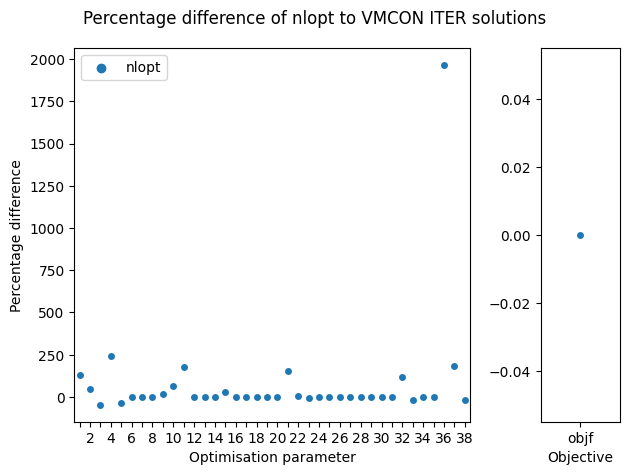

In [21]:
plot_mfile_solutions(
    iter_vmcon_mfile_path,
    iter_nlopt_mfile_path,
    "vmcon",
    "nlopt",
    "Percentage difference of nlopt to VMCON ITER solutions"
)


The nlopt solution appears quite different to the VMCON one; certainly much more so than the baseline 2017 case. Despite the FOM (`bt`) not changing at 5.3 T, `itvar010` (`enbeam`, neutral beam energy (keV)) has changed by ~320 %. Is this a legitimate alternative solution?

## Conclusion

nlopt can solve some of the problems defined by Process, once mitigating strategies for unevaluatable points have been implemented. These nlopt-obtained solutions can be similar or dissimilar to results obtained with VMCON, and require further scrutiny. It is hoped that by making other solvers available to Process, solutions obtained with VMCON can be validated.


## Tolerances

The above nlopt runs were performed with high tolerances (1e-3 for the Augmented Lagrangian optimiser, 1e-5 for the constraints and 1e-8 for the subsidary optimiser (SLSQP)). VMCON operates with a 1e-6 tolerance for its Augmented Lagrangian optimiser, but the other tolerances are not obvious and are currently unknown.

In order to assist with comparisons between solutions, it would be meaningful to quote the convergence parameter and constraint residuals when comparing solutions from nlopt and VMCON.

### Convergence parameter and constraint residuals

Constraint residuals can easily be calculated and nlopt solutions compared with VMCON. The convergence parameters are harder to compare, as this requires the Lagrange multipliers which aren't accessible in nlopt, and would need to be calculated separately.

In the previous nlopt solution for baseline 2017, the result was:

```
Iteration 1130, objective function = 1.8923, constraint residuals = 1.257e-05
```

The individual constraint tolerances were set to 1e-5. The total (equality) constraint residuals = 1.257e-05.
Optimisation terminated because `result=3`; `NLOPT_FTOL_REACHED`, which means that either the relative or absolute tolerance on the objective function was reached. 

In contrast, the VMCON solution was:

```
=>   19  vmcon iterations. Normalised FoM =  1.8922  Residuals (sqsumsq) = 1.9E-10  Convergence param = 6.4E-11
```

The figure of merits are very similar, but VMCON's residuals are much lower. As mentioned above, the convergence parameter can't easily be compared with nlopt. It would be preferable to get nlopt's constraint residuals comparable to VMCON's.

### Lowering nlopt tolerances

Need something here...